### Praktikum Pengolahan Citra
### Pertemuan 3 (8-3-2021)
#### Nama : Wahyu Primayasa
#### Kelas : 2 D4 Teknik Informatika B
#### NRP : 2110191046

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time
from array import *

## Praktikum 3 Flip Image

In [2]:
def flip_image():
    img = mpimg.imread('doraemon.jpg')
    horizontal_img = cv2.flip(img, 1)
    vertical_img = cv2.flip(img, 0)
    both_img = cv2.flip(img, -1)    
    
    plt.subplot(2,2,1), plt.imshow(img)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2), plt.imshow(horizontal_img)
    plt.title('Flip Horizontal'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3), plt.imshow(vertical_img)
    plt.title('Flip Vertikal'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4), plt.imshow(both_img)
    plt.title('Flip Both'), plt.xticks([]), plt.yticks([])

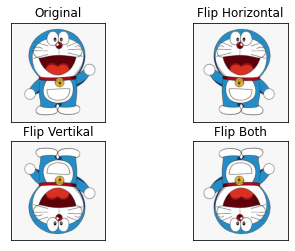

In [3]:
flip_image()

## Prak 4 Grayscale and Threshold
### Grayscale OpenCV

In [4]:
def gray_image():
    ori = mpimg.imread('doraemon.jpg')
    img = cv2.cvtColor(ori,cv2.COLOR_BGR2GRAY)
    ret,biner = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    plt.subplot(1, 3, 1), plt.imshow(ori, cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 2), plt.imshow(img, cmap ='gray')
    plt.title('Grayscale'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 3), plt.imshow(biner, cmap ='gray')
    plt.title('Biner'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

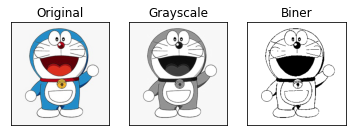

In [5]:
gray_image();

### Grayscale Manual

In [6]:
def grayscale():
    ori_img = mpimg.imread('doraemon.jpg')
    row1, col1, n = ori_img.shape
    
    gray_img = np.zeros((row1,col1,3), np.uint8)    
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            gray = R/3 + G/3 + B/3
            if gray>255:
                gray = 255
            gray_img[x1, y1] = [gray, gray, gray]
            
    optimum_gray_img = np.zeros((row1,col1,3), np.uint8)    
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            gray = 0.42*R  + 0.32*G + 0.28*B
            if gray>255:
                gray = 255
            gray_img[x1, y1] = [gray, gray, gray]
            
    plt.subplot(1, 3, 1), plt.imshow(ori_img, cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 2), plt.imshow(gray_img, cmap ='gray')
    plt.title('Grayscale'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 3), plt.imshow(gray_img, cmap ='gray')
    plt.title('Optimum Grayscale'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

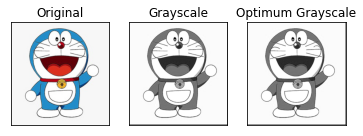

In [7]:
grayscale()

### Thresholding

In [5]:
def threshold(a):
    ori_img = mpimg.imread('doraemon.jpg')
    row1, col1, n = ori_img.shape
    b = int(256/a)
    
    gray_img = np.zeros((row1,col1,3), np.uint8)
    
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            gray = 0.42*R  + 0.32*G + 0.28*B
            if gray>255:
                gray = 255
            x = b * int(gray/b)            
            gray_img[x1, y1] = [x, x, x]
    return gray_img

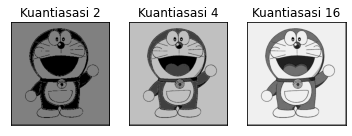

In [7]:
img_2 = threshold(2)
img_4 = threshold(4)
img_16 = threshold(16)

plt.subplot(1, 3, 1), plt.imshow(img_2, cmap = 'gray')
plt.title('Kuantiasasi 2'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(img_4, cmap ='gray')
plt.title('Kuantiasasi 4'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(img_16, cmap ='gray')
plt.title('Kuantiasasi 16'), plt.xticks([]), plt.yticks([])
plt.show()

## Prak 5 Brightness, Contrast and Auto Level
### Brightness

In [10]:
def brightness(b):
    ori_img = mpimg.imread('doraemon.jpg')
    row1, col1, n = ori_img.shape
        
    new_img = np.zeros((row1,col1,3), np.uint8)    
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            x = 0.42*R  + 0.32*G + 0.28*B
            if x>255:
                x = 255
            xb = x + b
            if xb>255:
                xb = 255
            elif xb<0:
                xb = 0
            new_img[x1, y1] = [xb, xb, xb]
    return new_img

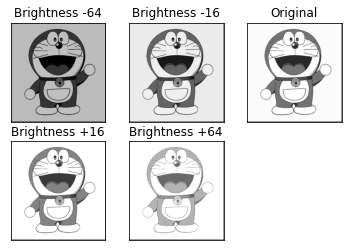

In [11]:
img_negative_64 = brightness(-64)
img_negative_16 = brightness(-16)
ori = brightness(0)
img_plus_16 = brightness(16)
img_plus_64 = brightness(64)

plt.subplot(2, 3, 1), plt.imshow(img_negative_64, cmap = 'gray')
plt.title('Brightness -64'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(img_negative_16, cmap = 'gray')
plt.title('Brightness -16'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(ori, cmap ='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(img_plus_16, cmap ='gray')
plt.title('Brightness +16'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(img_plus_64, cmap ='gray')
plt.title('Brightness +64'), plt.xticks([]), plt.yticks([])
plt.show()

### Contrast

In [12]:
def contrast(k):
    ori_img = mpimg.imread('doraemon.jpg')
    row1, col1, n = ori_img.shape
        
    new_img = np.zeros((row1,col1,3), np.uint8)    
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            x = 0.42*R  + 0.32*G + 0.28*B
            if x>255:
                x = 255
            xk = x*k
            if xk>255:
                xk = 255
            elif xk<0:
                xk = 0
            new_img[x1, y1] = [xk, xk, xk]
    return new_img

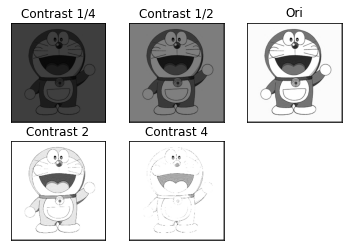

In [13]:
img_contrast_seperempat = contrast(0.25)
img_contrast_setengah = contrast(0.5)
ori = brightness(0)
img_contrast_2 = contrast(2)
img_contrast_4 = contrast(4)

plt.subplot(2, 3, 1), plt.imshow(img_contrast_seperempat, cmap = 'gray')
plt.title('Contrast 1/4'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(img_contrast_setengah, cmap ='gray')
plt.title('Contrast 1/2'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(ori, cmap ='gray')
plt.title('Ori'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(img_contrast_2, cmap ='gray')
plt.title('Contrast 2'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(img_contrast_4, cmap ='gray')
plt.title('Contrast 4'), plt.xticks([]), plt.yticks([])
plt.show()

### Auto Level
#### Versi 1

In [6]:
def auto_level():
    ori_img = mpimg.imread('doraemon.jpg')
    row1, col1, n = ori_img.shape
    x_min = 300
    x_max = 0
        
    new_img = np.zeros((row1,col1,3), np.uint8)
    
    #find x_min and x_max
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            x = 0.42*R  + 0.32*G + 0.28*B
            if x>x_max:
                x_max = x
            if x<x_min:
                x_min = x
    print(x_max)
    print(x_min)
    
    #auto level
    d = x_min - x_max
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            x = 0.42*R  + 0.32*G + 0.28*B
            new_x = 255/d * (x-x_max)
            if new_x>255:
                new_x = 255
            elif new_x<0:
                new_x = 0
            new_img[x1, y1] = [new_x, new_x, new_x]
            
    plt.subplot(1, 2, 1), plt.imshow(ori_img, cmap ='gray')
    plt.title('Otiginal'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 2, 2), plt.imshow(new_img, cmap ='gray')
    plt.title('Auto Level'), plt.xticks([]), plt.yticks([])
    plt.show()

260.1
0.0


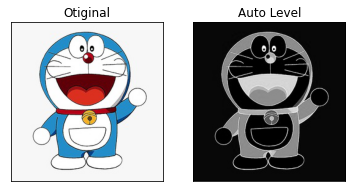

In [7]:
auto_level()

### Versi 2

In [16]:
def auto_level2():
    ori_img = mpimg.imread('doraemon.jpg')
    row1, col1, n = ori_img.shape
    x_min = 0
    x_max = 300
        
    new_img = np.zeros((row1,col1,3), np.uint8)
    
    #find x_min and x_max
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            x = 0.42*R  + 0.32*G + 0.28*B
            if x<x_max:
                x_max = x
            if x>x_min:
                x_min = x
    
    #auto level
    d = x_min - x_max
    for y1 in range(0, col1-1):
        for x1 in range(0, row1-1):
            R, G, B = ori_img[x1, y1]
            x = 0.42*R  + 0.32*G + 0.28*B
            new_x = 255/d * (x-x_max)
            if new_x>255:
                new_x = 255
            elif new_x<0:
                new_x = 0
            new_img[x1, y1] = [new_x, new_x, new_x]
            
    plt.subplot(1, 2, 1), plt.imshow(ori_img, cmap ='gray')
    plt.title('Otiginal'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 2, 2), plt.imshow(new_img, cmap ='gray')
    plt.title('Auto Level'), plt.xticks([]), plt.yticks([])
    plt.show()

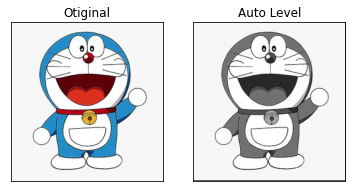

In [17]:
auto_level2()